<a href="https://colab.research.google.com/github/parasjain2426/Speech-Recognition/blob/master/SpeechPrac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import librosa
import numpy as np
from librosa.feature import mfcc
import os
import tensorflow as tf

In [0]:
def soundwind(sam):
  window_size = 1000
  dataset = []
  ds = tf.expand_dims(sam,axis=1)
  ds = tf.data.Dataset.from_tensor_slices(ds)
  ds = ds.window(window_size,shift=1,drop_remainder=True)
  ds = ds.flat_map(lambda i:i.batch(window_size))
  # ds = ds.batch(32).prefetch(1)
  for i in ds:
    dataset.append(i.numpy())
  dataset = np.array(dataset)
  return dataset

In [3]:
xtrain = []
# nsamples = 9000
file_loc = '/content/drive/My Drive/Colab_Examples/Sound'
fdir = os.listdir(file_loc)
for i in fdir:
  sam,samr = librosa.load(os.path.join(file_loc,i),sr = 1000,duration=1.5)
  print(sam.shape)
  print(os.path.join(file_loc,i))
  xtrain.append(soundwind(sam))
xtrain = np.array(xtrain)  

(1500,)
/content/drive/My Drive/Colab_Examples/Sound/Paras_1.m4a
(1500,)
/content/drive/My Drive/Colab_Examples/Sound/Paras_2.m4a
(1500,)
/content/drive/My Drive/Colab_Examples/Sound/HR_1.m4a
(1500,)
/content/drive/My Drive/Colab_Examples/Sound/HR_2.m4a
(1500,)
/content/drive/My Drive/Colab_Examples/Sound/TGS_1.m4a
(1500,)
/content/drive/My Drive/Colab_Examples/Sound/TGS_2.m4a


In [4]:
print(xtrain.shape)

(6, 501, 1000, 1)


<Figure size 432x288 with 0 Axes>

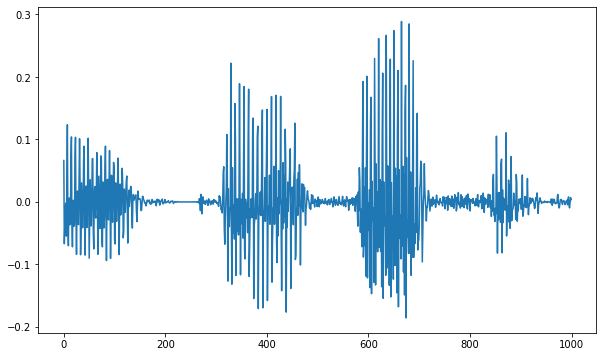

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(xtrain[4][500])
plt.figure()

In [6]:
# Creating Datasets
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
classes = ['Paras','Paras','HR','HR','ThingsGoSocial','ThingsGoSocial']
lb = LabelEncoder()
y = lb.fit_transform(classes)
y = to_categorical(y,num_classes=3)
print(y)
print(y.shape)
print(lb.classes_)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
(6, 3)
['HR' 'Paras' 'ThingsGoSocial']


Using TensorFlow backend.


In [7]:
#### Using Image Model for Sound ######
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,GlobalAveragePooling2D,Flatten,MaxPooling2D

model = Sequential([
                    Conv2D(64,(3,3),activation = 'relu',input_shape = (501,1000,1)),
                    Conv2D(32,(3,3),activation = 'relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(32,(3,3),activation = 'relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(32,(3,3),activation = 'relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Conv2D(32,(3,3),activation = 'relu'),
                    # GlobalAveragePooling2D(),
                    Flatten(),
                    Dense(64,activation = 'relu'),
                    Dense(32,activation = 'relu'),
                    Dense(3,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 499, 998, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 497, 996, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 248, 498, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 246, 496, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 248, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 121, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 123, 32)      

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [9]:
model.fit(
    xtrain,
    y,
    epochs = 10
)

Epoch 1/10
6/6 [==============================] - 19s 3s/step - loss: 1.0996 - accuracy: 0.3333
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 1.0476 - accuracy: 0.6667
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.7656 - accuracy: 0.6667
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.3552 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 15s 3s/step - loss: 0.0800 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 13s 2s/step - loss: 2.7056e-04 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 13s 2s/step - loss: 5.6595e-05 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 13s 2s/step - loss: 1.8933e-05 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 13s 2s/step - loss: 1.3470e-05 - accuracy: 1.0000


In [15]:
xtest=[]
floc = '/content/drive/My Drive/Colab_Examples/Sound_test' #audio file directory
fdir = os.listdir(floc)
testsam,testsamr = librosa.load(os.path.join(floc,fdir[3]),sr=1000,duration=1.5)
print(os.path.join(floc,fdir[3]))
xtest.append(soundwind(testsam))
xtest = np.array(xtest)
print(xtest.shape)
features = model.predict(xtest)
print(np.argmax(features))
print(lb.inverse_transform([np.argmax(features)]))

/content/drive/My Drive/Colab_Examples/Sound_test/HR_t.m4a
(1, 501, 1000, 1)
0
['HR']


In [0]:
import IPython.display as ipd
testsam,testsamr = librosa.load(os.path.join(floc,fdir[5]),sr=5000,duration=1.5)
ipd.Audio(testsam,rate=5000)

In [0]:
sd = []
# nsamples = 9000
file_loc = '/content/drive/My Drive/Colab_Examples/Sound'
fdir = os.listdir(file_loc)
for i in fdir:
  sam,samr = librosa.load(os.path.join(file_loc,i),sr = 5000,duration=1.5)
  print(sam.shape)
  print(os.path.join(file_loc,i))
  # sam = np.pad(sam, (nsamples - sam.shape[0], 0), mode='constant')
  samfcc = np.mean(mfcc(sam,sr=5000,n_mfcc=15),axis=0)
  # print(samfcc.shape)
  sd.append(samfcc)
sd = np.array(sd)
print(sd.shape)  

(7500,)
/content/drive/My Drive/Colab_Examples/Sound/TGS_1.m4a
(7500,)
/content/drive/My Drive/Colab_Examples/Sound/TGS_2.m4a
(7500,)
/content/drive/My Drive/Colab_Examples/Sound/Paras_2.m4a
(7500,)
/content/drive/My Drive/Colab_Examples/Sound/HR_2.m4a
(7500,)
/content/drive/My Drive/Colab_Examples/Sound/Paras_1.m4a
(7500,)
/content/drive/My Drive/Colab_Examples/Sound/HR_1.m4a
(6, 15)


In [0]:
sd = np.expand_dims(sd, axis=2)
print(sd.shape)

(6, 15, 1)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Bidirectional,LSTM,Conv1D
model = Sequential([
         Conv1D(32,5,input_shape=[15,1],activation='relu'),
         Bidirectional(LSTM(50,return_sequences = True)),
         Bidirectional(LSTM(50,return_sequences = True)),
         Flatten(),
         Dense(32,activation='relu'),
         Dense(64,activation='relu'),
         Dense(3,activation='softmax')           
])
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 11, 32)            192       
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 11, 100)           33200     
_________________________________________________________________
bidirectional_32 (Bidirectio (None, 11, 100)           60400     
_________________________________________________________________
flatten_13 (Flatten)         (None, 1100)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 32)                35232     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_42 (Dense)             (None, 3)               

In [0]:
optimizer = keras.optimizers.Adam()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=["accuracy"])

In [0]:
# Creating Datasets
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
classes = ['ThingsGoSocial','ThingsGoSocial','Paras','HR','Paras','HR']
lb = LabelEncoder()
y = lb.fit_transform(classes)
y = to_categorical(y,num_classes=3)
print(y)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [0]:
his = model.fit(sd,y,epochs = 30)

Epoch 1/30
6/6 [==============================] - 2s 338ms/step - loss: 1.0939 - accuracy: 0.3333
Epoch 2/30
6/6 [==============================] - 0s 4ms/step - loss: 1.0935 - accuracy: 0.3333
Epoch 3/30
6/6 [==============================] - 0s 4ms/step - loss: 1.0870 - accuracy: 0.6667
Epoch 4/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0709 - accuracy: 0.6667
Epoch 5/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0639 - accuracy: 0.3333
Epoch 6/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0483 - accuracy: 0.3333
Epoch 7/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0334 - accuracy: 1.0000
Epoch 8/30
6/6 [==============================] - 0s 3ms/step - loss: 1.0139 - accuracy: 1.0000
Epoch 9/30
6/6 [==============================] - 0s 4ms/step - loss: 0.9817 - accuracy: 1.0000
Epoch 10/30
6/6 [==============================] - 0s 4ms/step - loss: 0.9449 - accuracy: 1.0000
Epoch 11/30
6/6 [====================

In [0]:
xt=[]
floc = '/content/drive/My Drive/Colab_Examples/Sound_test' #audio file directory
fdir = os.listdir(floc)
testsam,testsamr = librosa.load(os.path.join(floc,fdir[4]),sr=5000,duration=2.0)
print(os.path.join(floc,fdir[4]))
# testsam = np.pad(testsam, (nsamples - testsam.shape[0], 0), mode='constant')
testsam = np.mean(mfcc(testsam,sr=5000,n_mfcc=15),axis=0)
xt.append(testsam)
xt = np.array(xt)  
xt = np.expand_dims(xt, axis=2)
print(xt.shape) 
features = model.predict(xt)
top_3 = np.argsort(features[0])[:-4:-1]

for i in range(3):
    print(" ({:.3})".format(features[0][top_3[i]]))
    # print(top_3[i])
print(lb.inverse_transform([top_3[0]])[0])   